## Import and Inspect the Data

In [1]:
import pandas as pd
data = pd.read_csv("/content/Pv_DATA_ANN.csv")
data.head(10)

,V1,P,G,Pmax,Vopt
0,1,1.639,200,53.71,36.2
1,2,3.273,200,53.71,36.2
2,3,4.902,200,53.71,36.2
3,4,6.527,200,53.71,36.2
4,5,8.147,200,53.71,36.2
5,6,9.762,200,53.71,36.2
6,7,11.370,200,53.71,36.2
7,8,12.980,200,53.71,36.2
8,9,14.580,200,53.71,36.2
9,10,16.170,200,53.71,36.2


## Preprocess Data


In [2]:
data_frame = pd.DataFrame(data)
data_frame

,V1,P,G,Pmax,Vopt
0,1,1.639,200,53.71,36.2
1,2,3.273,200,53.71,36.2
2,3,4.902,200,53.71,36.2
3,4,6.527,200,53.71,36.2
4,5,8.147,200,53.71,36.2
...,...,...,...,...,...
1255,41,257.000,1000,292.70,38.0
1256,42,221.000,1000,292.70,38.0
1257,43,167.500,1000,292.70,38.0
1258,44,94.870,1000,292.70,38.0


In [3]:
# Creating features and labels
X = data_frame.drop("Pmax", axis=1)
y = data_frame["Pmax"]
X.shape, y.shape

((1260, 4), (1260,))

In [4]:
# Creating training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
len(X), len(X_train), len(X_test)

(1260, 1008, 252)

In [5]:
X_train.head()

,V1,P,G,Vopt
950,6,40.78,830,37.9
979,35,233.00,830,37.9
941,42,169.10,800,37.7
126,37,71.35,260,36.6
255,31,86.58,350,37.0


## Build first model

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras

# Set random seed
tf.random.set_seed(42)

# Create model (model_1)
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(10, activation="relu"),
                               tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                metrics=["mae"])

# Fit the model
history_1=model_1.fit(X_train, y_train, epochs=100)


Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 202.6631 - mae: 202.6631
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 182.6466 - mae: 182.6466
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 171.0006 - mae: 171.0006
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 169.4303 - mae: 169.4303
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 169.5088 - mae: 169.5088
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 168.5838 - mae: 168.5838
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 165.5161 - mae: 165.5161
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 167.0325 - mae: 167.0325
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 165.9864 - mae: 165.9864
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 163.3684 - mae: 163.3684
Epoch 11/100
32/32 

## Evaluate the model

Text(0, 0.5, 'loss')

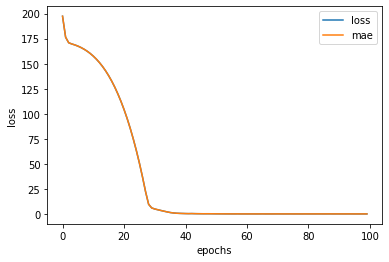

In [7]:
# Plot training curve
pd.DataFrame(history_1.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

In [8]:
# Evaluate the model
model_1.evaluate(X_test, y_test)

8/8 [==============================] - 0s 3ms/step - loss: 0.1285 - mae: 0.1285


[0.12847328186035156, 0.12847328186035156]

# Build second model with normalized data


## Preprocess data

In [9]:
data_frame

,V1,P,G,Pmax,Vopt
0,1,1.639,200,53.71,36.2
1,2,3.273,200,53.71,36.2
2,3,4.902,200,53.71,36.2
3,4,6.527,200,53.71,36.2
4,5,8.147,200,53.71,36.2
...,...,...,...,...,...
1255,41,257.000,1000,292.70,38.0
1256,42,221.000,1000,292.70,38.0
1257,43,167.500,1000,292.70,38.0
1258,44,94.870,1000,292.70,38.0


In [10]:
data_frame["V1"].max(), data_frame["P"].max(), data_frame["G"].max(), data_frame["Vopt"].max()

(45, 292.7, 1000, 38.9)

In [11]:
X["V1"] = X["V1"]/45
X["P"] = X["P"]/292.7
X["G"] = X["G"]/1000
X["Vopt"] =X["Vopt"]/38.9
X["V1"].max(), X["P"].max(), X["G"].max(), X["Vopt"].max()

(1.0, 1.0, 1.0, 1.0)

In [12]:
y.max()
y = y/292.7
y.max()

1.0

In [13]:
# Creating training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
len(X), len(X_train), len(X_test)

(1260, 1008, 252)

## Build second model (model_2)

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras

# Set random seed
tf.random.set_seed(42)

# Create model (model_1)
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=keras.losses.mse,
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["mse"])

# Fit the model
history_2=model_2.fit(X_train, y_train, epochs=50)


Epoch 1/50
32/32 [==============================] - 1s 2ms/step - loss: 0.0699 - mse: 0.0699
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0010 - mse: 0.0010    
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 1.0647e-04 - mse: 1.0647e-04
Epoch 4/50
32/32 [==============================] - 0s 1ms/step - loss: 2.5906e-05 - mse: 2.5906e-05
Epoch 5/50
32/32 [==============================] - 0s 3ms/step - loss: 9.4840e-06 - mse: 9.4840e-06
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 7.0182e-06 - mse: 7.0182e-06
Epoch 7/50
32/32 [==============================] - 0s 3ms/step - loss: 6.1641e-06 - mse: 6.1641e-06
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 4.5944e-06 - mse: 4.5944e-06
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 4.6176e-06 - mse: 4.6176e-06
Epoch 10/50
32/32 [==============================] - 0s 2ms/step - loss: 3.2142e-06 - mse: 3.2142e-06
E

## Evaluate our model

In [15]:
# Evaluate the model
model_2.evaluate(X_test, y_test)

8/8 [==============================] - 0s 4ms/step - loss: 1.4853e-05 - mse: 1.4853e-05


[1.4853332686470821e-05, 1.4853332686470821e-05]

Text(0, 0.5, 'loss')

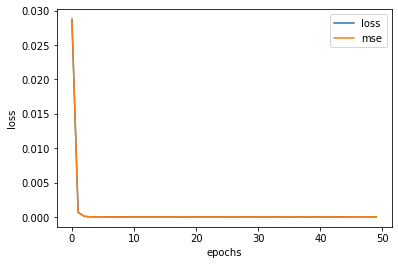

In [16]:
# Plot training curve
pd.DataFrame(history_2.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

In [17]:
y_preds = model_2.predict(X_test)

In [18]:
y_preds

array([[0.5214576 ],
       [0.7725036 ],
       [0.8636715 ],
       [0.4308526 ],
       [0.4619959 ],
       [0.58357155],
       [0.9232363 ],
       [0.52399737],
       [0.800561  ],
       [0.40089467],
       [0.67568463],
       [0.4914901 ],
       [0.64645606],
       [0.6123372 ],
       [0.9874967 ],
       [0.67621684],
       [0.9256199 ],
       [0.9832739 ],
       [0.7694806 ],
       [0.9838348 ],
       [0.8315374 ],
       [0.3688031 ],
       [1.0055366 ],
       [0.86283094],
       [0.6483054 ],
       [0.7403942 ],
       [0.21440603],
       [0.6144578 ],
       [0.82932925],
       [0.46120235],
       [0.67855173],
       [1.0065687 ],
       [0.4914785 ],
       [0.43016672],
       [0.64560527],
       [1.0059255 ],
       [0.36845225],
       [0.43015364],
       [0.3391742 ],
       [0.49216303],
       [0.33687484],
       [0.9251122 ],
       [0.43025604],
       [0.3993672 ],
       [0.491684  ],
       [0.2157727 ],
       [0.18422389],
       [0.583

In [19]:
y_test = tf.squeeze(y_test)

In [20]:
y_test

<tf.Tensor: shape=(252,), dtype=float64, numpy=
array([0.51930304, 0.76597198, 0.85787496, 0.42774172, 0.45814827,
       0.58079945, 0.91902972, 0.51930304, 0.79672019, 0.39699351,
       0.67372737, 0.48889648, 0.64297916, 0.61223095, 0.97984284,
       0.67372737, 0.91902972, 0.97984284, 0.76597198, 0.97984284,
       0.82712675, 0.3662453 , 1.        , 0.85787496, 0.64297916,
       0.73522378, 0.2137342 , 0.61223095, 0.82712675, 0.45814827,
       0.67372737, 1.        , 0.48889648, 0.42774172, 0.64297916,
       1.        , 0.3662453 , 0.42774172, 0.33573625, 0.48889648,
       0.33573625, 0.91902972, 0.42774172, 0.39699351, 0.48889648,
       0.2137342 , 0.18349846, 0.58079945, 0.97984284, 0.61223095,
       0.88828152, 0.67372737, 0.2137342 , 0.24410659, 0.42774172,
       0.70447557, 0.79672019, 0.76597198, 0.73522378, 0.79672019,
       0.18349846, 0.42774172, 0.48889648, 0.61223095, 0.85787496,
       0.85787496, 0.91902972, 0.85787496, 0.73522378, 0.61223095,
       0.36624

In [21]:
y_preds=tf.squeeze(y_preds)


In [22]:
y_preds

<tf.Tensor: shape=(252,), dtype=float32, numpy=
array([0.5214576 , 0.7725036 , 0.8636715 , 0.4308526 , 0.4619959 ,
       0.58357155, 0.9232363 , 0.52399737, 0.800561  , 0.40089467,
       0.67568463, 0.4914901 , 0.64645606, 0.6123372 , 0.9874967 ,
       0.67621684, 0.9256199 , 0.9832739 , 0.7694806 , 0.9838348 ,
       0.8315374 , 0.3688031 , 1.0055366 , 0.86283094, 0.6483054 ,
       0.7403942 , 0.21440603, 0.6144578 , 0.82932925, 0.46120235,
       0.67855173, 1.0065687 , 0.4914785 , 0.43016672, 0.64560527,
       1.0059255 , 0.36845225, 0.43015364, 0.3391742 , 0.49216303,
       0.33687484, 0.9251122 , 0.43025604, 0.3993672 , 0.491684  ,
       0.2157727 , 0.18422389, 0.58328444, 0.986127  , 0.6145554 ,
       0.8951268 , 0.6748349 , 0.21641237, 0.24500524, 0.43020377,
       0.70799047, 0.8016306 , 0.7692923 , 0.7386676 , 0.7995607 ,
       0.18524642, 0.4302948 , 0.4907706 , 0.61528665, 0.86327446,
       0.8648302 , 0.92493266, 0.8637871 , 0.7404475 , 0.615356  ,
       0.36932

In [23]:
s1 = y_test*292.7
s2 = y_preds*292.7
s1, s2

(<tf.Tensor: shape=(252,), dtype=float64, numpy=
 array([152.  , 224.2 , 251.1 , 125.2 , 134.1 , 170.  , 269.  , 152.  ,
        233.2 , 116.2 , 197.2 , 143.1 , 188.2 , 179.2 , 286.8 , 197.2 ,
        269.  , 286.8 , 224.2 , 286.8 , 242.1 , 107.2 , 292.7 , 251.1 ,
        188.2 , 215.2 ,  62.56, 179.2 , 242.1 , 134.1 , 197.2 , 292.7 ,
        143.1 , 125.2 , 188.2 , 292.7 , 107.2 , 125.2 ,  98.27, 143.1 ,
         98.27, 269.  , 125.2 , 116.2 , 143.1 ,  62.56,  53.71, 170.  ,
        286.8 , 179.2 , 260.  , 197.2 ,  62.56,  71.45, 125.2 , 206.2 ,
        233.2 , 224.2 , 215.2 , 233.2 ,  53.71, 125.2 , 143.1 , 179.2 ,
        251.1 , 251.1 , 269.  , 251.1 , 215.2 , 179.2 , 107.2 , 224.2 ,
        116.2 , 215.2 ,  62.56, 215.2 , 188.2 ,  62.56, 242.1 , 116.2 ,
        215.2 , 116.2 , 260.  , 197.2 , 233.2 , 286.8 , 206.2 , 269.  ,
         62.56, 152.  , 260.  ,  89.31, 292.7 , 125.2 , 224.2 , 233.2 ,
        206.2 , 269.  , 179.2 ,  80.37, 215.2 , 170.  , 125.2 , 233.2 ,
        277.9 ,

In [27]:
s1[100], s2[100]

(<tf.Tensor: shape=(), dtype=float64, numpy=215.2>,
 <tf.Tensor: shape=(), dtype=float32, numpy=215.96245>)